In [4]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as D
import os
import multiprocessing as mp
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [11]:
fig = np.load("finalfig300.np.npy")

In [12]:
print(np.shape(fig))

(8, 900, 1800)


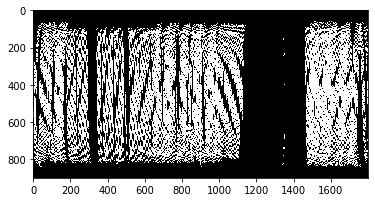

In [34]:
plt.imshow(fig[0], cmap ='gray')

In [40]:
try:
    plt.imsave('./whathappend.png', fig[0], cmap ='gray')
except BaseException:
        print('error!')

error!


In [38]:
print(np.shape(fig[0]))

(900, 1800)
